## Saturation analyses on the Lx (concordance)
Based on concordance. The concordance calculations are added using 02d-concordance_ad_hoc_Lx

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
dir_Lx = '../out/20.0518 Lx/'

In [34]:
def getConcord(x, mod_sfx):
    # get concordance scores
    concord_tr = pd.read_csv('%s/L%s%s/anlyz/concordance/concordance_tr.csv' % (dir_Lx, x, mod_sfx))
    concord_te = pd.read_csv('%s/L%sonly_reg_rf_boruta/anlyz/concordance/concordance_te.csv' % (dir_Lx, x))
    
    c_mean_tr = concord_tr.concordance.mean()
    c_mean_te = concord_te.concordance.mean()
    c_med_tr = concord_tr.concordance.median()
    c_med_te = concord_te.concordance.median()
                
    return c_mean_tr, c_mean_te, c_med_tr, c_med_te, concord_tr.shape[0]


def getStats(mod_sfx):
    df_stats = {'Lx':[], 'c_mean_tr':[], 'c_mean_te':[], 'c_med_tr':[], 'c_med_te':[], 'n_targets':[]}
    for x in Lx_range:
        df_stats['Lx'].append(x)
        c_mean_tr, c_mean_te, c_med_tr, c_med_te, n_targets = getConcord(x, mod_sfx)
        df_stats['c_mean_tr'].append(c_mean_tr)
        df_stats['c_mean_te'].append(c_mean_te)
        df_stats['c_med_tr'].append(c_med_tr)
        df_stats['c_med_te'].append(c_med_te)
        df_stats['n_targets'].append(n_targets)
    df_stats = pd.DataFrame(df_stats)
    return df_stats

### LxOnly rf-boruta

In [53]:
Lx_range = [25,75,100,200,300]
df_stats = getStats('only_reg_rf_boruta')
df_stats

,Lx,c_mean_tr,c_mean_te,c_med_tr,c_med_te,n_targets
0,25,0.831300,0.789341,0.836066,0.816092,559
1,75,0.843861,0.796724,0.843238,0.816092,546
2,100,0.848353,0.803438,0.846311,0.816092,535
3,200,0.857340,0.813930,0.852459,0.827586,521
4,300,0.870738,0.816207,0.864754,0.827586,500


[Text(0.5, 0, 'Lx'), Text(0, 0.5, 'Concordance')]

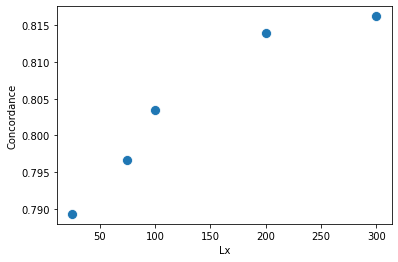

In [54]:
ax = sns.scatterplot(df_stats.Lx, df_stats.c_mean_te, s=100)
ax.set(xlabel='Lx', ylabel='Concordance')

### LxOnly elastic-net genome-wide

In [48]:
Lx_range = [25,75,100,200]
df_stats = getStats('only_reg_elasticnet_all')
df_stats

,Lx,c_mean_tr,c_mean_te,c_med_tr,c_med_te,n_targets
0,25,0.873783,0.789341,0.940574,0.816092,1487
1,75,0.895392,0.796724,0.965164,0.816092,2620
2,100,0.898453,0.803438,0.965164,0.816092,2594
3,200,0.900985,0.813930,0.967213,0.827586,2729


[Text(0.5, 0, 'Lx'), Text(0, 0.5, 'Concordance')]

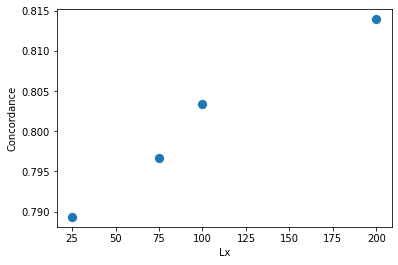

In [49]:
ax = sns.scatterplot(df_stats.Lx, df_stats.c_mean_te, s=100)
ax.set(xlabel='Lx', ylabel='Concordance')